In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 16)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Payement Mode,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,cash,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,cash,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,cash,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,cash,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,cash,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Payement Mode     11156 non-null  object 
 13  Amount            11239 non-null  float64
 14  Status            0 non-null      float64
 15  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(9)
memor

In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Payement Mode          95
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
# drop unrequired column
df.drop(["Status","unnamed1"], axis=1, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Payement Mode     11156 non-null  object 
 13  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(9)
memory usage: 1.2+ MB


In [10]:
# drop rows with missing values
df.dropna(inplace=True)

In [11]:
# from this we can see that row count is decreased as we delete null records
df.shape

(11144, 14)

In [12]:
# now we want to change data type of amount column from float to int
df['Amount']=df['Amount'].astype('int')

In [13]:
# data type of amount column is changed
df['Amount'].dtype

dtype('int32')

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Payement Mode', 'Amount'],
      dtype='object')

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.114400e+04,11144.000000,11144.000000,11144.000000,11144.000000
mean,1.003004e+06,35.397613,0.419508,2.489681,9455.129307
std,1.716830e+03,12.727976,0.493501,1.115465,5215.014485
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.000000,5435.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8117.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12678.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# describe for specific columns
df[['User_ID','Amount']].describe()

,User_ID,Amount
count,1.114400e+04,11144.000000
mean,1.003004e+06,9455.129307
std,1.716830e+03,5215.014485
min,1.000001e+06,188.000000
25%,1.001492e+06,5435.000000
50%,1.003065e+06,8117.000000
75%,1.004426e+06,12678.500000
max,1.006040e+06,23952.000000


# Analysis Based on Gender

In [21]:
# Find Number of Customer base on Gender
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
F    7754
M    3390
Name: count, dtype: int64

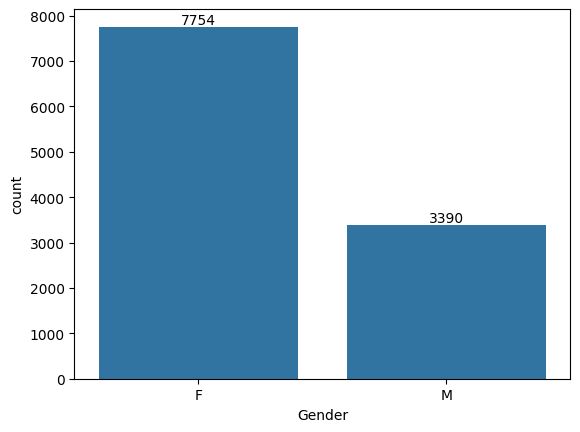

In [22]:
ax = sns.countplot(x='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
# Average order value by Gender
average_order_value_by_gender = df.groupby('Gender')['Amount'].mean()
print(average_order_value_by_gender)

Gender
F    9495.385865
M    9363.049853
Name: Amount, dtype: float64


In [25]:
# Define the bins and labels for age groups
bins = [10, 25, 40, 55, 70, 85, 100]
labels = ['10-25', '26-40', '41-55', '56-70', '71-85', '86-100']



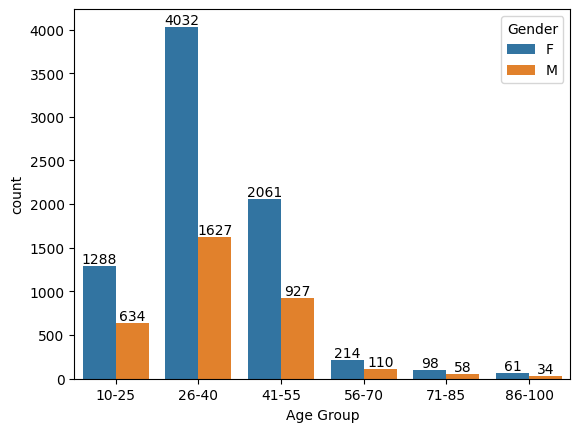

In [26]:
# find male/femal in age group
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)



Age Group
10-25     17580241
26-40     53424971
41-55     28765465
56-70      3146558
71-85      1542860
86-100      907866
Name: Amount, dtype: int32


C:\Users\abhis\AppData\Local\Temp\ipykernel_16768\607437192.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, palette='viridis')


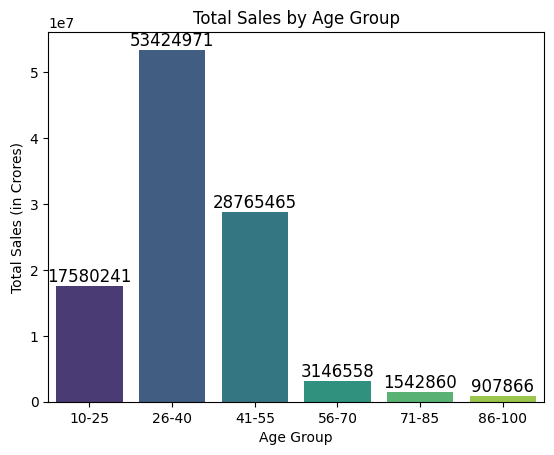

In [29]:
# Total Sales According to Different Age Group

# Create a new column 'Age Group' by categorizing 'Age' into bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate total sales by age group
sales_by_age_group = df.groupby('Age Group')['Amount'].sum()

# Display the sales by age group
print(sales_by_age_group)

# Optionally, plot the sales by age group
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sales_by_age_group.index, y=sales_by_age_group.values, palette='viridis')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (in Crores)')
for index, value in enumerate(sales_by_age_group.values):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

   Age Group    Product_Category  Count
6      10-25                Food    502
21     26-40  Clothing & Apparel   1337
39     41-55  Clothing & Apparel    712
60     56-70                Food     76
75     71-85  Clothing & Apparel     37
93    86-100  Clothing & Apparel     25


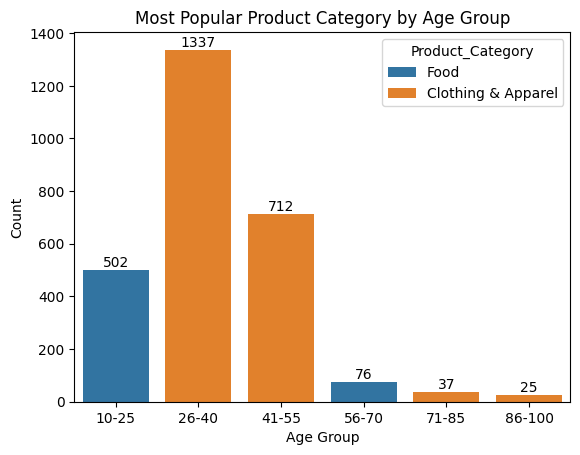

In [31]:
# Most Popular Product by age group (we used sum of orders count for this)

popular_products = df.groupby(['Age Group', 'Product_Category']).size().reset_index(name='Count')

# For each Age Group, find the Product Category with the maximum count
most_popular_product = popular_products.loc[popular_products.groupby('Age Group')['Count'].idxmax()]

# Display the most popular product for each age group
print(most_popular_product)

ax= sns.barplot(x='Age Group', y='Count', hue='Product_Category', data=most_popular_product)

# Add title and labels
plt.title('Most Popular Product Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

for bars in ax.containers:
    ax.bar_label(bars)
    
# Show the plot
plt.show()

In [39]:
# similarly we can find product orders counts according to age group for all product category
popular_products = df.groupby(['Age Group', 'Product_Category']).size().reset_index(name='Count')

print(popular_products)

    Age Group    Product_Category  Count
0       10-25                Auto     15
1       10-25              Beauty     78
2       10-25               Books     17
3       10-25  Clothing & Apparel    475
4       10-25               Decor     19
..        ...                 ...    ...
103    86-100            Pet Care      1
104    86-100     Sports Products      2
105    86-100          Stationery      1
106    86-100          Tupperware      1
107    86-100          Veterinary      0

[108 rows x 3 columns]


                       Orders    Amount
Product_Category                       
Food                     6103  33840126
Clothing & Apparel       6633  16488159
Footwear & Shoes         2631  15434499
Electronics & Gadgets    5076  15296087
Furniture                 879   5359218
Games & Toys              940   4331694
Sports Products           870   3635933
Auto                      235   1911215
Beauty                   1049   1875620
Stationery                275   1637671
Household items          1331   1569337
Tupperware                160   1114031
Books                     245   1061478
Decor                     235    730360
Pet Care                  536    482277
Hand & Power Tools         80    405618
Veterinary                206    112702
Office                    261     81936


<Axes: xlabel='Product_Category', ylabel='Orders'>

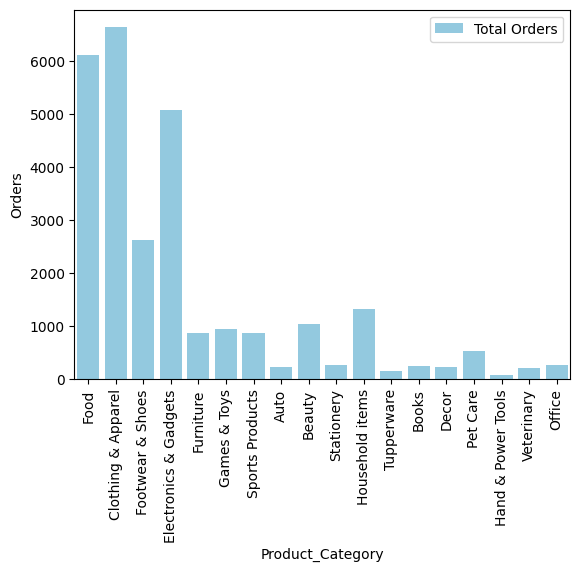

In [42]:
# To find revenue & total orders by product_category
revenue_by_category = df.groupby('Product_Category').agg({'Orders': 'sum', 'Amount': 'sum'})
revenue_by_category = revenue_by_category.sort_values(by='Amount', ascending=False)

print(revenue_by_category)

plt.xticks(rotation=90)
sns.barplot(x='Product_Category', y='Orders', data=revenue_by_category,  color='skyblue', label='Total Orders')

In [43]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'married' if x == 1 else 'unmarried')

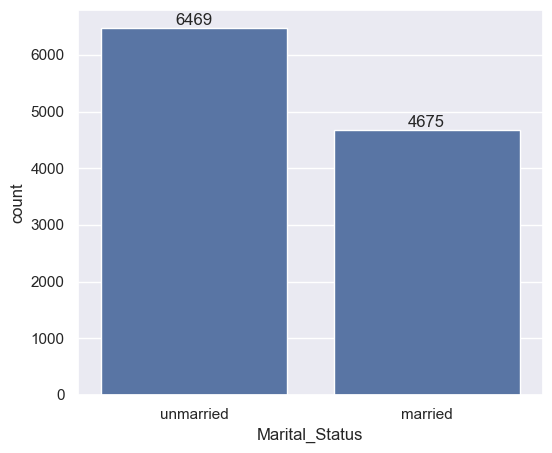

In [48]:
# Now we are finding sales based on Marital_Status
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

  Marital_Status Gender    Amount
0        married      F  30222989
1        married      M  13477851
2      unmarried      F  43404233
3      unmarried      M  18262888


<Axes: xlabel='Marital_Status', ylabel='Amount'>

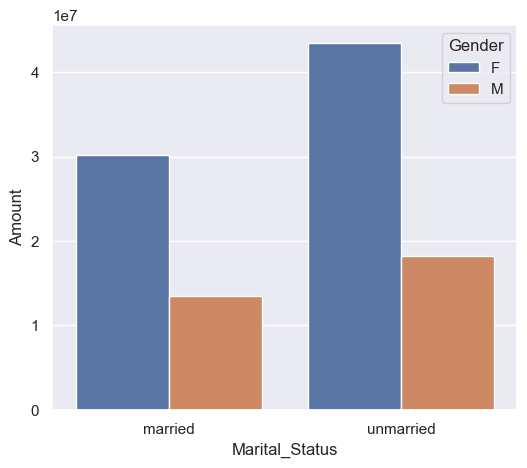

In [92]:
# sales based on marital status
sales_based_on_Marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum()
print(sales_based_on_Marital_status)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_based_on_Marital_status, x = 'Marital_Status',y= 'Amount', hue='Gender')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

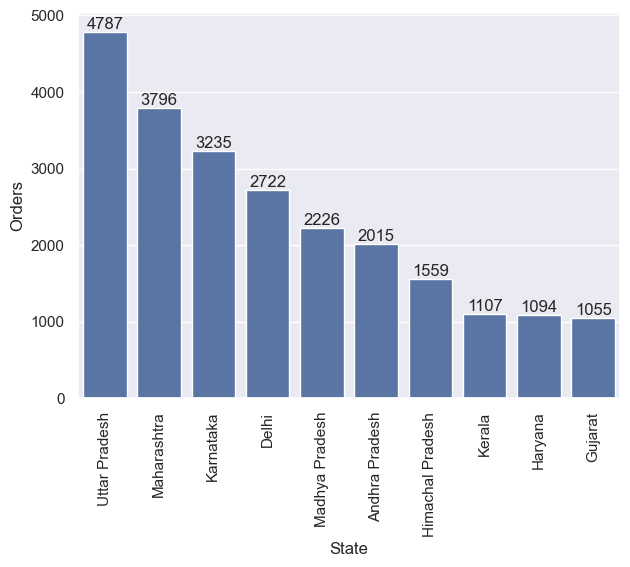

In [50]:
# Now for sales & orders based on Region (Zone, state)

# Total number of orders from top 10 states(for top ten we used head(10) function)

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
ax = sns.barplot(data = sales_state, x = 'State',y= 'Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

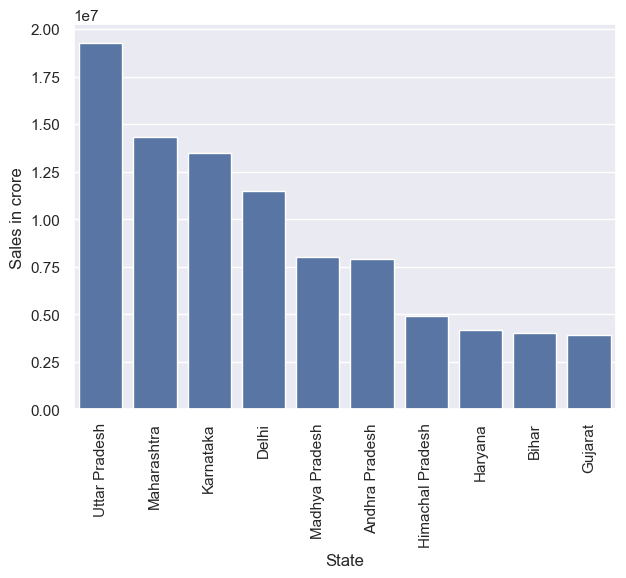

In [51]:
# To find total sales Revenue from states (here we have taken top 10 states by revenue for which we used head() function)
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.ylabel("Sales in crore")
plt.xticks(rotation=90)

          Orders    Amount
Zone                      
Central    10550  41291144
Eastern     2003   7019154
Northern    3685  12489023
Southern    6656  26318827
Western     4851  18249813


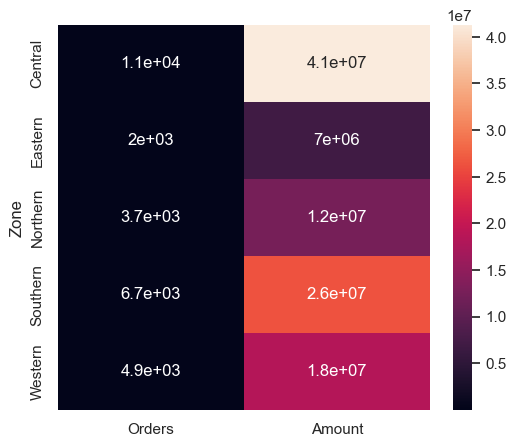

In [97]:
# revenue & orders according to zone
revenue_by_zone = df.groupby('Zone').agg({'Orders': 'sum', 'Amount': 'sum'})
print(revenue_by_zone)

sns.heatmap(revenue_by_zone,annot = True)
plt.show()

In [96]:
# revenue & orders according to zone & State
data = df.groupby([ 'Zone','State']).agg({ 'Orders': 'sum', 'Amount': 'sum'})

print(data)

                           Orders    Amount
Zone     State                             
Central  Delhi               2722  11483791
         Madhya Pradesh      2226   8021032
         Uttar Pradesh       4787  19283348
         Uttarakhand          815   2502973
Eastern  Bihar               1054   4004698
         Jharkhand            949   3014456
Northern Haryana             1094   4169636
         Himachal Pradesh    1559   4920110
         Punjab               484   1501850
         Rajasthan            548   1897427
Southern Andhra Pradesh      2015   7909198
         Karnataka           3235  13476144
         Kerala              1107   3805925
         Telangana            299   1127560
Western  Gujarat             1055   3908070
         Maharashtra         3796  14341743


In [78]:
# Now we are finding sales based on occupation of Customers
occupation_user_count = df.groupby('Occupation')['User_ID'].count()
print(occupation_user_count)

Occupation
Agriculture         281
Automobile          563
Aviation           1296
Banking            1128
Chemical            538
Construction        401
Food Processing     418
Govt                846
Healthcare         1396
Hospitality         698
IT Sector          1576
Lawyer              529
Media               634
Retail              497
Textile             343
Name: User_ID, dtype: int64


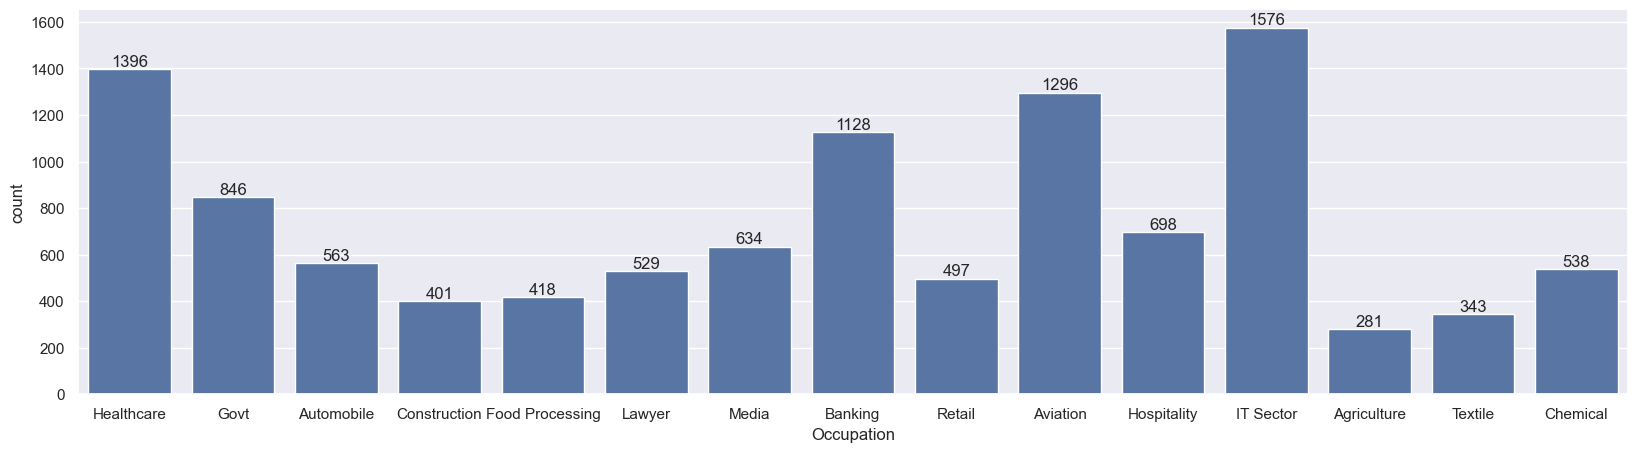

In [85]:
# to find count of users Based on occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

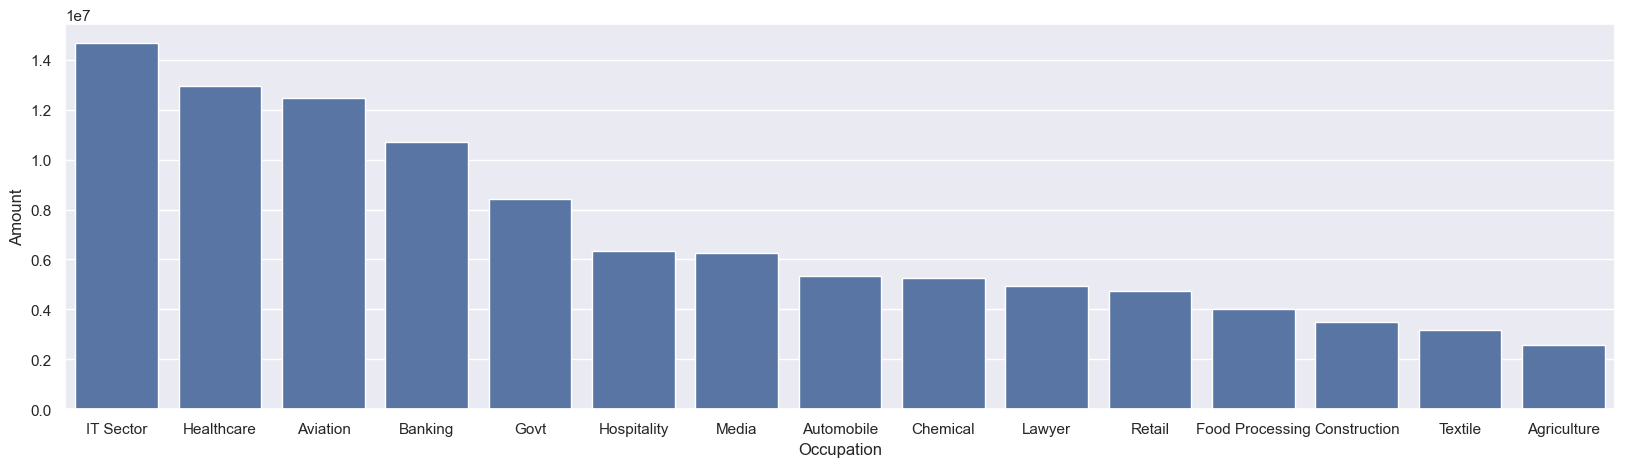

In [86]:
# To find sales or revenue generated  by users from different Occupation

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

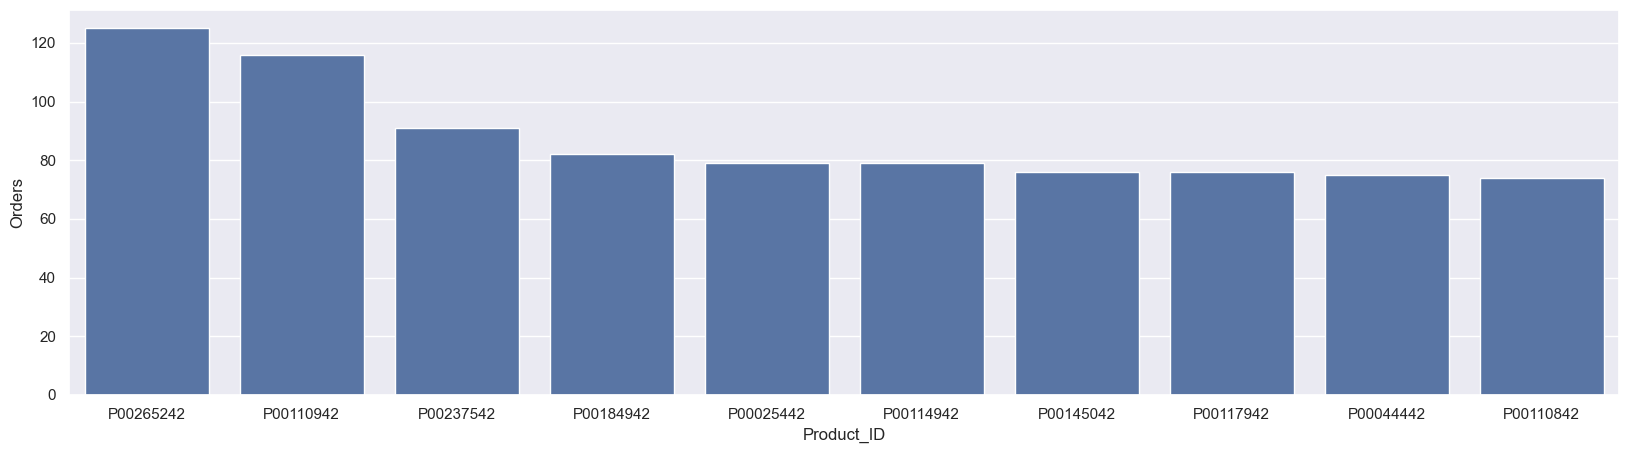

In [88]:
# to find Product that Purchased most of the time we find this using product_id (top 10 products based on orders)
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

Payement Mode
cash           34855586
credit card    35171782
points         35340593
Name: Amount, dtype: int32


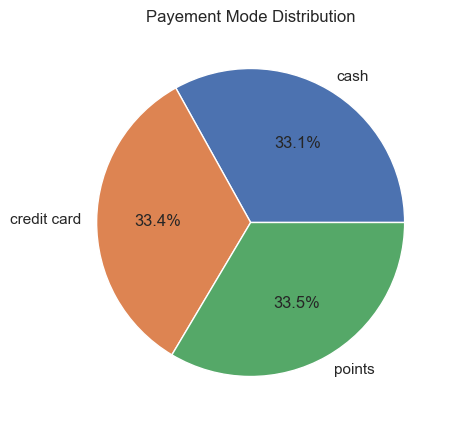

In [90]:
# To find Transaction Mode that is mo
payment_mode_sums = df.groupby('Payement Mode')['Amount'].sum()
print(payment_mode_sums)

# Created the pie chart
plt.pie(payment_mode_sums, labels=payment_mode_sums.index, autopct='%1.1f%%')

plt.title('Payement Mode Distribution')

plt.show()